In [50]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
import numpy as np

In [19]:
data = pd.read_csv('dataset.csv')
data_array = data.values

In [20]:
data

,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
0,AR,Argentina,2020-02-23,8.185,17.563,0.437,13.644,5.334,-2.486,0,0
1,AR,Argentina,2020-02-24,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0
2,AR,Argentina,2020-02-25,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0
3,AR,Argentina,2020-02-26,2.304,5.399,-2.273,0.845,9.461,12.584,0,0
4,AR,Argentina,2020-02-27,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0
...,...,...,...,...,...,...,...,...,...,...,...
812,ZA,South Africa,2020-04-01,-42.446,-37.600,34.916,-69.728,-77.371,-72.935,1380,5
813,ZA,South Africa,2020-04-02,-40.523,-38.226,36.550,-69.577,-77.874,-73.331,1462,5
814,ZA,South Africa,2020-04-03,-42.107,-43.271,38.379,-71.513,-77.944,-72.745,1505,9
815,ZA,South Africa,2020-04-04,-51.515,-57.252,26.499,-76.589,-77.026,-55.095,1585,9


In [33]:
grocery = data['grocery_pharmacy'].values.reshape(-1,1)
parks = data['parks'].values.reshape(-1,1)
residential = data['residential'].values.reshape(-1,1)
retail = data['retail_recreation'].values.reshape(-1,1)
transit = data['transit_stations'].values.reshape(-1,1)
work = data['workplaces'].values.reshape(-1,1)
cases = data['total_cases'].values.reshape(-1,1)
deaths = data['fatalities'].values.reshape(-1,1)

In [34]:
labelencoder_X = LabelEncoder()

In [35]:
start_date=datetime.strptime(min(data.iloc[:,2]),"%Y-%m-%d")
independent_data=data.iloc[:,0:1].values
dates=data.iloc[:,2].values
new_dates=[]
dependant_data=data.iloc[:,9:].values

In [36]:
for row in data.iloc[:,2].values: #calculates diff of dates in days
  new_dates.append((datetime.strptime(row,"%Y-%m-%d")-start_date).days)

In [37]:
# independent_data[:,0] = labelencoder_X.fit_transform(independent_data[:,0])
independent_data = OneHotEncoder().fit_transform(independent_data).toarray()
independent_data = np.append(independent_data,np.array(new_dates)[:, None],axis=1) #append dates
independent_data = np.append(independent_data,data.iloc[:,3:9].values,axis=1)

In [38]:
independent_data

array([[  1.   ,   0.   ,   0.   , ...,  13.644,   5.334,  -2.486],
       [  1.   ,   0.   ,   0.   , ...,  -9.973, -26.785, -53.687],
       [  1.   ,   0.   ,   0.   , ..., -19.717, -28.485, -50.053],
       ...,
       [  0.   ,   0.   ,   0.   , ..., -71.513, -77.944, -72.745],
       [  0.   ,   0.   ,   0.   , ..., -76.589, -77.026, -55.095],
       [  0.   ,   0.   ,   0.   , ..., -75.913, -78.001, -44.329]])

In [41]:
# Linear Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(grocery, cases, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

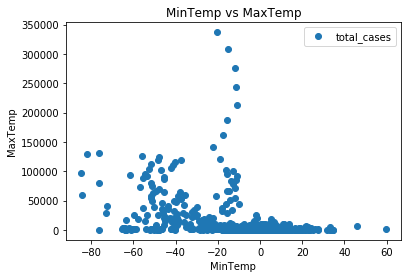

In [54]:
data.plot(x='grocery_pharmacy', y='total_cases', style='o')  
plt.title('grocery_pharmacy vs total_cases')  
plt.xlabel('grocery_pharmacy')  
plt.ylabel('Ma')  
plt.show()

In [46]:
# table showing actual vs predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,927,-28842.121250
1,32986,17132.406107
2,60,-2030.410561
3,241,837.554426
4,158,35464.040193
...,...,...
159,25,2777.177928
160,499,22391.428044
161,17963,40673.890245
162,2247,25893.888074


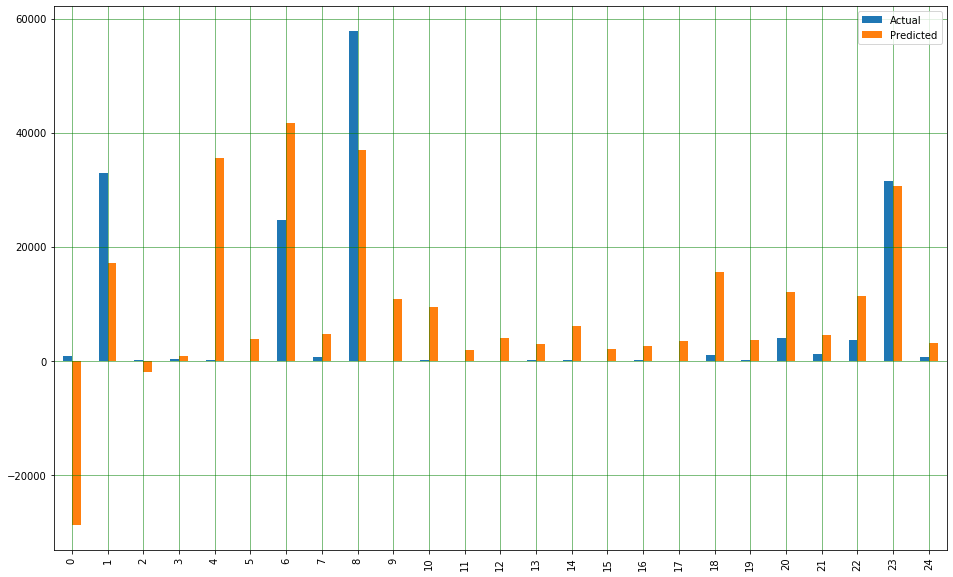

In [51]:
# graphic showing actual vs predicted values
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

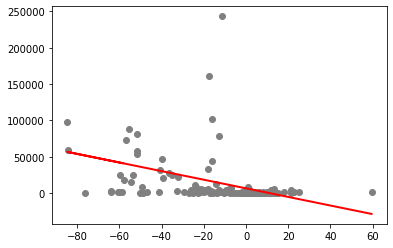

In [52]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()